# Relativistic orbit of massive particle

** Martin Johnsrud **

The metric for a massive point particle of mass M, the Schwarzschild metric, is

$$
    \mathrm{d}s^2 = - \bigg(1 - \frac{2 M}{r} \bigg) \mathrm{d}t^2 + \bigg(1 - \frac{2 M}{r} \bigg)^{-1} \mathrm{d}r^2 + r^2 (\mathrm{d} \theta^2 + \sin(\theta) \mathrm d \phi^2) 
$$

We can assume a particle moves in a plane $\theta = \pi / 2$, and that $\dot \theta = 0$. The two killing vector fields
$$
    \xi ^\mu = (1, 0, 0, 0), \quad \eta^\mu = (0, 0, 0, 1)
$$
gives rise to the constants of motion

$$
    -\xi \cdot \dot x = \bigg(1 - \frac{2 M}{r} \bigg) \frac{\mathrm{d} t}{\mathrm d {\tau}} = e, \quad \eta \cdot \dot x = r^2 \frac{\mathrm{d} \phi}{\mathrm d {\tau}} = \ell.
$$

The last constant of motion is the normalization condition

$$
    u \cdot u = \mathrm{d}s^2 = - \bigg(1 - \frac{2 M}{r} \bigg) \bigg( \frac{\mathrm{d} t}{\mathrm d {\tau}} \bigg)^2 
    + \bigg(1 - \frac{2 M}{r} \bigg)^{-1} \bigg( \frac{\mathrm{d} r}{\mathrm d {\tau}} \bigg)^2 
    + r^2 \bigg( \frac{\mathrm{d} \phi}{\mathrm d {\tau}} \bigg)^2 
$$

With these, we get the equation of motion for a massive (test) particel around a mass M:

$$
    \dot r = \sqrt{2(E - V(r))}, \quad \dot \phi = \frac{l}{r^2},
$$
Where E = (e - 1)/2 is the energy per unit mass of the test particle, and V is the effective potential,
$$
    V(r) = -\frac M r + \frac{\ell^2}{2 r^2} - \frac{M \ell^2}{r^2}
$$

in this project, M is normalized to 1.

In [2]:
import numpy as np
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt
from matplotlib import cm

font = {'family' : 'serif', 
        'weight' : 'normal', 
        'size'   : 22}
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc("lines", lw=2)

In [3]:
def V(r, l):
    return - 1 / r + l**2 / (2 * r**2) - l**2 / r**3

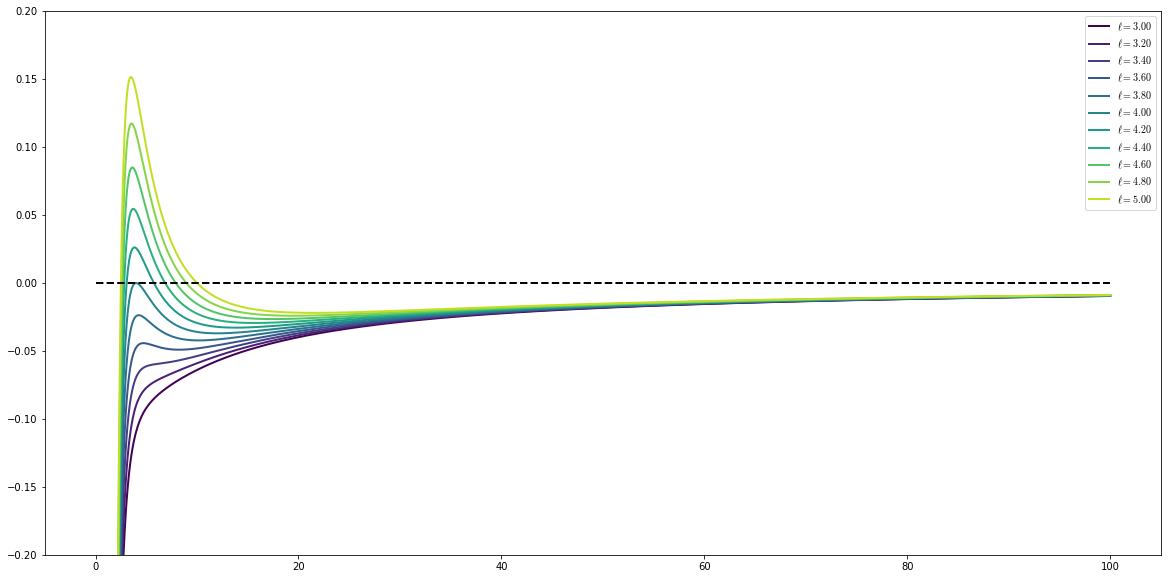

In [4]:
# Resolution in the radial direction
n = 1000
# Number of different angular momenta
m = 11
# Shcwarzschild radius
Rs = 2

Rmin = 0.99*Rs
Rmax = 100
lmin = 3
lmax = 5

r = np.linspace(Rmin, Rmax, n)
l_vals = np.linspace(lmin, lmax, m)

fig, ax = plt.subplots(figsize=(20, 10))

for i, l in enumerate(l_vals):
    ax.plot(r, V(r, l), color=cm.viridis(i / m), label="$\ell = {:.2f}$".format(l))

ax.plot([0, Rmax], [0, 0], "k--")

ax.set_ylim((-0.2, 0.2))
plt.legend()
plt.show()

The coordinates of the particle is a vector $v = (r(\tau), \phi(\tau))$, so that the problem kan be written in Runge-Kutta form

$$
    \frac{\mathrm d v}{\mathrm d \theta } \equiv \dot v = f(v) = \bigg(\sqrt{2(E - V(r))},\,  l / r^2 \bigg)
$$

In [5]:
def f(v, *param):
    l, E = param
    return np.array([sqrt(2*np.abs(E - V(v[0], l))), l / v[0]**2])

The path of the particle is so simulated by using the Runge-Kutta 4 integrator, with a eigen-time step `dt´.

In [6]:
def RK4(v, i, dt, l, E, sgn ):
    param = l, E
    k1 = f(v[i], *param) * dt
    k2 = f(v[i] + k1 / 2, *param) * dt
    k3 = f(v[i] + k2 / 2, *param) * dt
    k4 = f(v[i] + k3, *param) * dt
    delta = 1 / 6 * (k1 + 2*k2 + 2*k3 + k4)

    if V(v[i, 0] + delta[0], l) > E : sgn *= -1
    delta[0] *= sgn[0]

    v[i + 1]  = v[i] + delta

In [7]:
def run_sim(N, dt, R0, l, E):
    assert(V(R0, l) < E)

    v = np.empty((N, 2))
    v[0] = np.array([R0, 0])
    sgn = np.array([-1])
    for i in range(N-1):
        RK4(v, i, dt, l, E, sgn)

    return v

In [8]:
def plot_orbit(v, E, l):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    Rmax = np.max(v[:, 0])
    Rmin = 0.9*Rs
    
    x = np.array([v[:, 0]*cos(v[:, 1]), v[:, 0]*sin(v[:, 1])])
    ax[0].plot(x[0], x[1])
    phi = np.linspace(0, 2*pi, 100)
    ax[0].plot(Rs*cos(phi), Rs*sin(phi), "k--", label="Schwarzschild radius")
    n_ticks = 100
    N = len(v) // n_ticks
    ax[0].plot(x[0,::N], x[1,::N], "k.", label = "Eigen-time ticks")

    ax[0].set_xlim(-Rmax, Rmax)
    ax[0].set_ylim(-Rmax, Rmax)
    ax[0].legend()
    
    r = np.linspace(Rmin, Rmax, 1000)
    ax[1].plot(r, V(r, l), label = "$V_{\mathrm{eff}}(r)$")
    ax[1].plot([Rmin, Rmax], [0, 0], "k--")
    ax[1].plot([Rmin, Rmax], [E, E], "r--", label="$(e^2 -1)/2$")
    ax[1].set_ylim(-0.1, 0.1)
    ax[1].set_ylabel("$E$")
    ax[1]

    ax[1].legend()
    return plt.show()

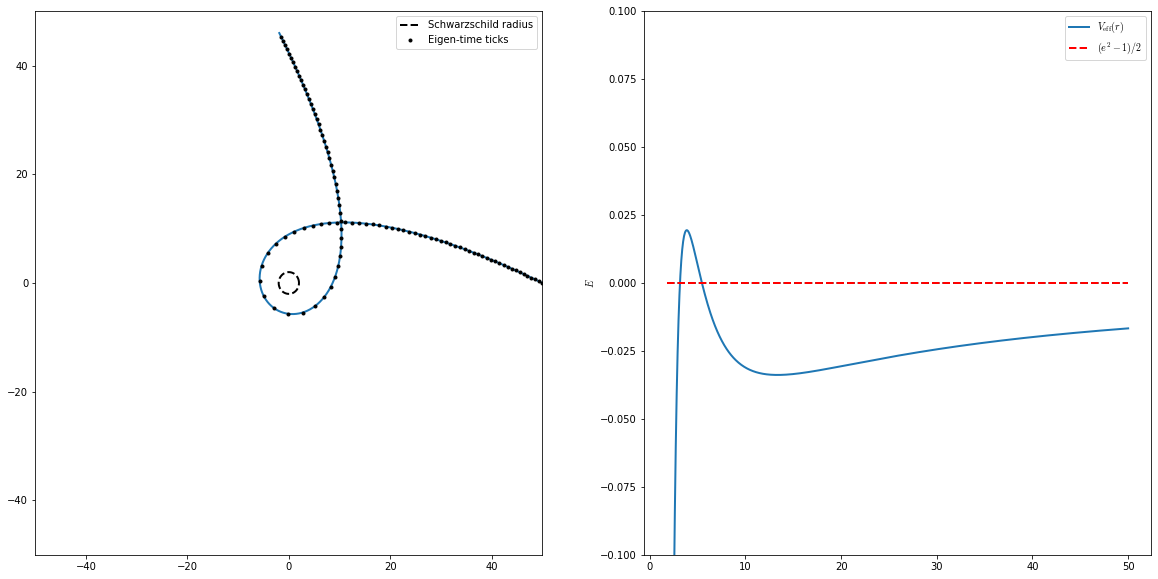

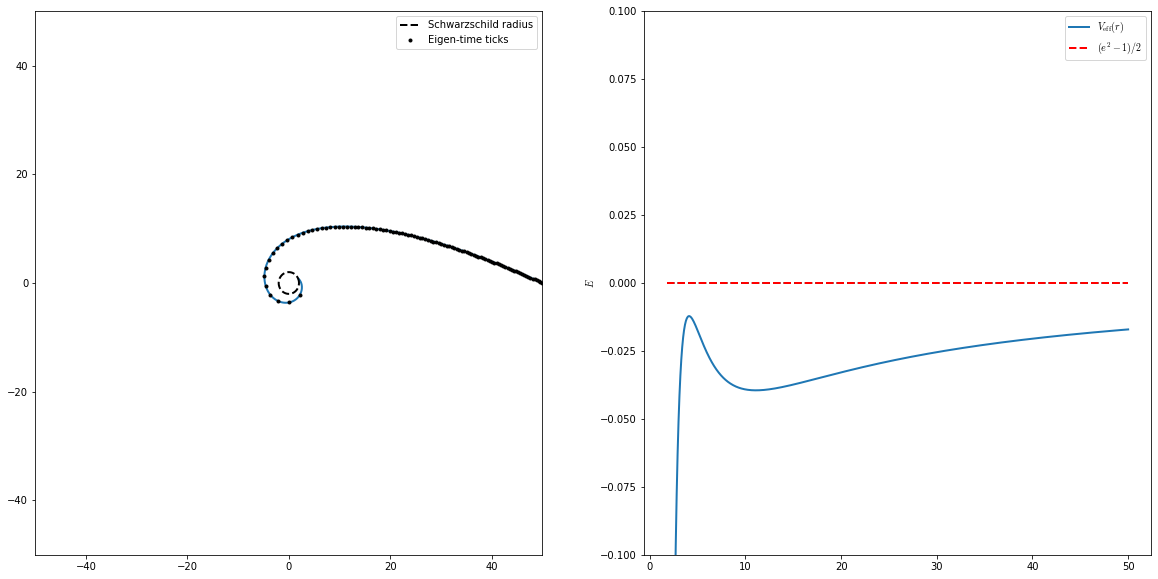

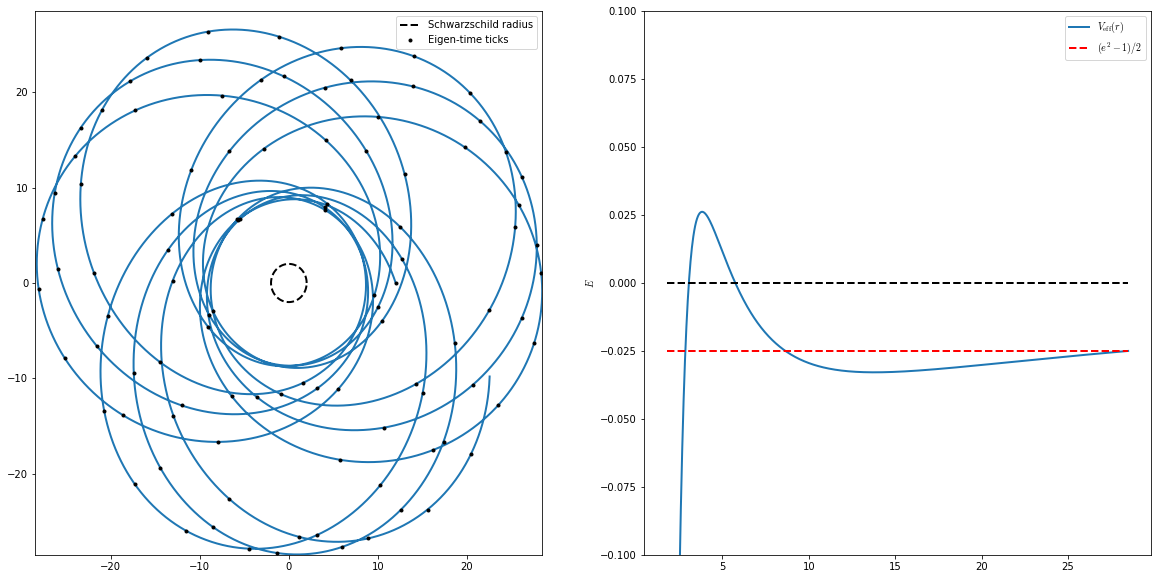

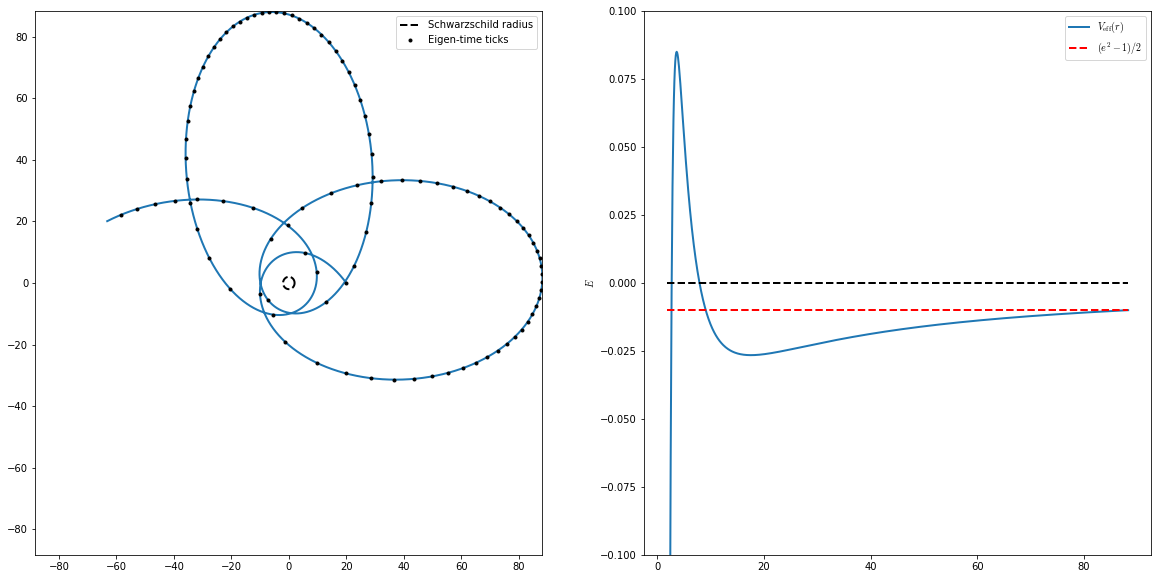

In [13]:
# Number of steps
Ns = [4000, 21000, 100000, 500000]
# Size of steps
dts = [0.1, 0.01, 0.05, 0.01]
# Intial conditions
R0s = [50, 50, 12, 20]
ls = [4.15, 3.9, 4.2, 4.6]
Es = [0.0, 0.0, -0.025, -0.01]

for i in range(len(Ns)):
    N, dt, R0, l, E = Ns[i], dts[i], R0s[i], ls[i], Es[i]
    v = run_sim(N, dt, R0, l, E)
    plot_orbit(v, E, l)